## IC-Br - Índice de Commodities (Banco Central)

### Carregamento dos Dados Fornecidos em xlsx

In [5]:
# Importando bibliotecas necessárias:

import requests # biblioteca para acessar e interagir com APIs e páginas da web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Bibliotecas de tratamento de estatistico de séries e de manipulação de datas e horários:

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

In [7]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [8]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

In [9]:
# Biblioteca para decomposição da Série de Tempo

from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
# Carregamento do arquivo localizado na pasta Dados
df = pd.read_excel('Dados/dados_IC.xlsx')

# Exibição das primeiras linhas do DataFrame
df.head(20)

,Indicadores Econômicos Selecionados de 14/05/2025,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Tabela 4 – Índice de Commodities - Brasil (IC-Br),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"O botão 2 na parte superior, à esquerda da tab...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Button 2 at the top, to the left of the table,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Em R$,NaN,NaN,NaN,Em US$,NaN,NaN,NaN
4,Período,Composto (em R$),Agropecuária (em R$),Metal (em R$),Energia (em R$),Composto (em US$),Agropecuária (em US$),Metal (em US$),Energia (em US$)
5,Table 4 – Commodity Index - Brazil (IC-Br),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Period,Composite (in R$),Agriculture (in R$),Metal (in R$),Energy (in R$),Composite (in US$),Agriculture (in US$),Metal (in US$),Energy (in US$)
7,SGS,27574,27575,27576,27577,29042,29041,29040,29039
8,1998-01-01 00:00:00,39.19,46.84,30.66,18.63,80.05,95.69,62.61,38.02
9,1998-02-01 00:00:00,38.98,46.62,30.64,18.25,79.08,94.6,62.14,36.99


In [33]:
#Corte do dataframe para excluir cabeçalhos no início e dados de resumo no final do dataframe

df = df.iloc[8:336].reset_index(drop=True)

In [34]:
#Exclusão das colunas contendo dados em US$

df = df.iloc[:, :5]

In [35]:
#Renomeando colunas:

df.columns = ['Data', 'Composto R$', 'Agropecuária R$', 'Metal R$', 'Energia R$']

In [36]:
df

,Data,Composto R$,Agropecuária R$,Metal R$,Energia R$
0,1998-01-01 00:00:00,39.19,46.84,30.66,18.63
1,1998-02-01 00:00:00,38.98,46.62,30.64,18.25
2,1998-03-01 00:00:00,38.16,45.4,30.7,18.11
3,1998-04-01 00:00:00,38.1,44.87,30.92,19.57
4,1998-05-01 00:00:00,38.21,45.28,30.18,19.34
...,...,...,...,...,...
323,2024-12-01 00:00:00,477.11,531.59,549.76,209.73
324,2025-01-01 00:00:00,482.57,537.72,543.84,216.72
325,2025-02-01 00:00:00,461.1,510.22,541.6,204.28
326,2025-03-01 00:00:00,447.04,484.87,560.79,201.16


In [37]:
df.iloc[2,2]

45.4

In [38]:
type(df.iloc[2,2])

float

### Conversão da data para formato datatime

In [20]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [39]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '1/31/1998', 
                         end = '4/30/2025', 
                         freq = 'M')

In [40]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe do índice de commodities

len(date_rng) == len(df.index)

True

In [41]:
#Inclusão do dataframe date_rng no dataframe df

df.insert(0,        # coluna de indice 0
            'Mês',    # nome da nova coluna
            date_rng)  # dados

In [42]:
#Exclusão da coluna "Data"

df = df.drop(["Data"], axis = 1)

In [43]:
#Criação de uma cópia do dataframe para uso

df_ic = df.copy()

In [44]:
df_ic

,Mês,Composto R$,Agropecuária R$,Metal R$,Energia R$
0,1998-01-31,39.19,46.84,30.66,18.63
1,1998-02-28,38.98,46.62,30.64,18.25
2,1998-03-31,38.16,45.4,30.7,18.11
3,1998-04-30,38.1,44.87,30.92,19.57
4,1998-05-31,38.21,45.28,30.18,19.34
...,...,...,...,...,...
323,2024-12-31,477.11,531.59,549.76,209.73
324,2025-01-31,482.57,537.72,543.84,216.72
325,2025-02-28,461.1,510.22,541.6,204.28
326,2025-03-31,447.04,484.87,560.79,201.16


### Criação de coluna com variação mensal do Índice de Commodities - Composto (%)

In [45]:
# Criação de uma nova coluna com a variação percentual mensal do Índice de Commodities - Composto

df_ic['IC - Composto Var Men (%)'] = df_ic["Composto R$"].pct_change() * 100

In [46]:
#Remoção da primeira linha do dataFrame

df_ic = df_ic.iloc[1:,].reset_index(drop=True)

In [47]:
df_ic

,Mês,Composto R$,Agropecuária R$,Metal R$,Energia R$,IC - Composto Var Men (%)
0,1998-02-28,38.98,46.62,30.64,18.25,-0.535851
1,1998-03-31,38.16,45.4,30.7,18.11,-2.103643
2,1998-04-30,38.1,44.87,30.92,19.57,-0.157233
3,1998-05-31,38.21,45.28,30.18,19.34,0.288714
4,1998-06-30,36.67,43.31,29.57,18.48,-4.030359
...,...,...,...,...,...,...
322,2024-12-31,477.11,531.59,549.76,209.73,6.736018
323,2025-01-31,482.57,537.72,543.84,216.72,1.144390
324,2025-02-28,461.1,510.22,541.6,204.28,-4.449095
325,2025-03-31,447.04,484.87,560.79,201.16,-3.049230


## Avaliação da Série de Variação Mensal do Índice de Commodities (Composto)

In [48]:
df_ic.columns

Index(['Mês', 'Composto R$', 'Agropecuária R$', 'Metal R$', 'Energia R$',
       'IC - Composto Var Men (%)'],
      dtype='object')

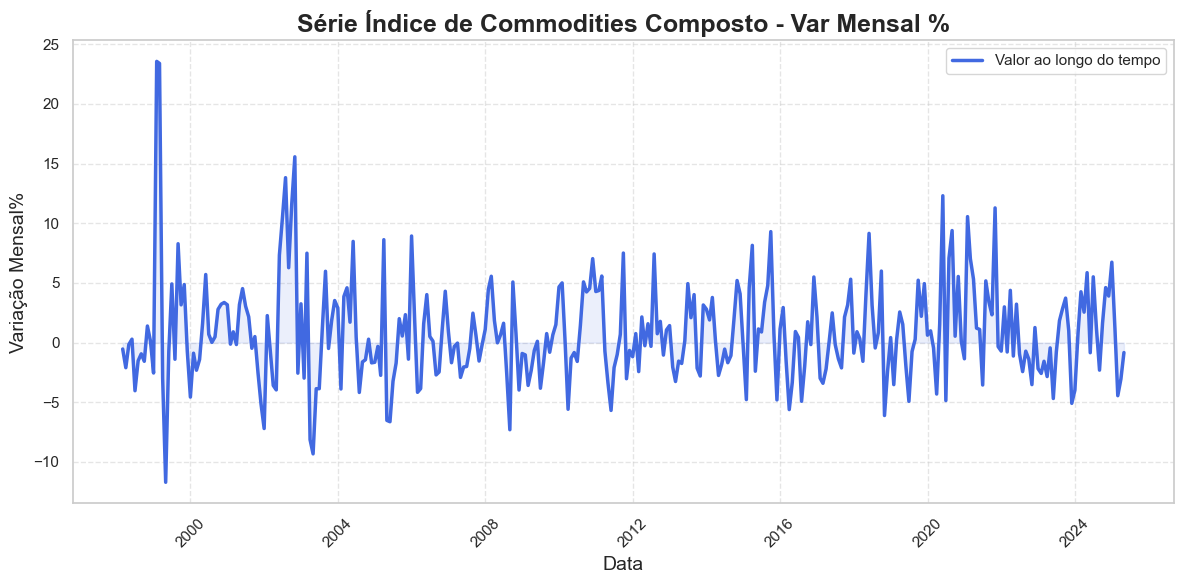

In [49]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_ic["Mês"], df_ic["IC - Composto Var Men (%)"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_ic["Mês"], df_ic["IC - Composto Var Men (%)"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série Índice de Commodities Composto - Var Mensal %', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Teste de Estacionariedade da Série

In [50]:
#Teste de ADF - Variação Mensal do Índice de Commodities Composto

resultado = adfuller(df_ic["IC - Composto Var Men (%)"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -13.203128
p-value: 0.000000
Valores Críticos:
	1%: -3.451
	5%: -2.870
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Para o nível de confiança de 95%, rejeita-se a hipótese de que a série da Variação Mensal do Índice de Commodities Composto não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [51]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos. Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ic["IC - Composto Var Men (%)"], model='additive', period = 12)

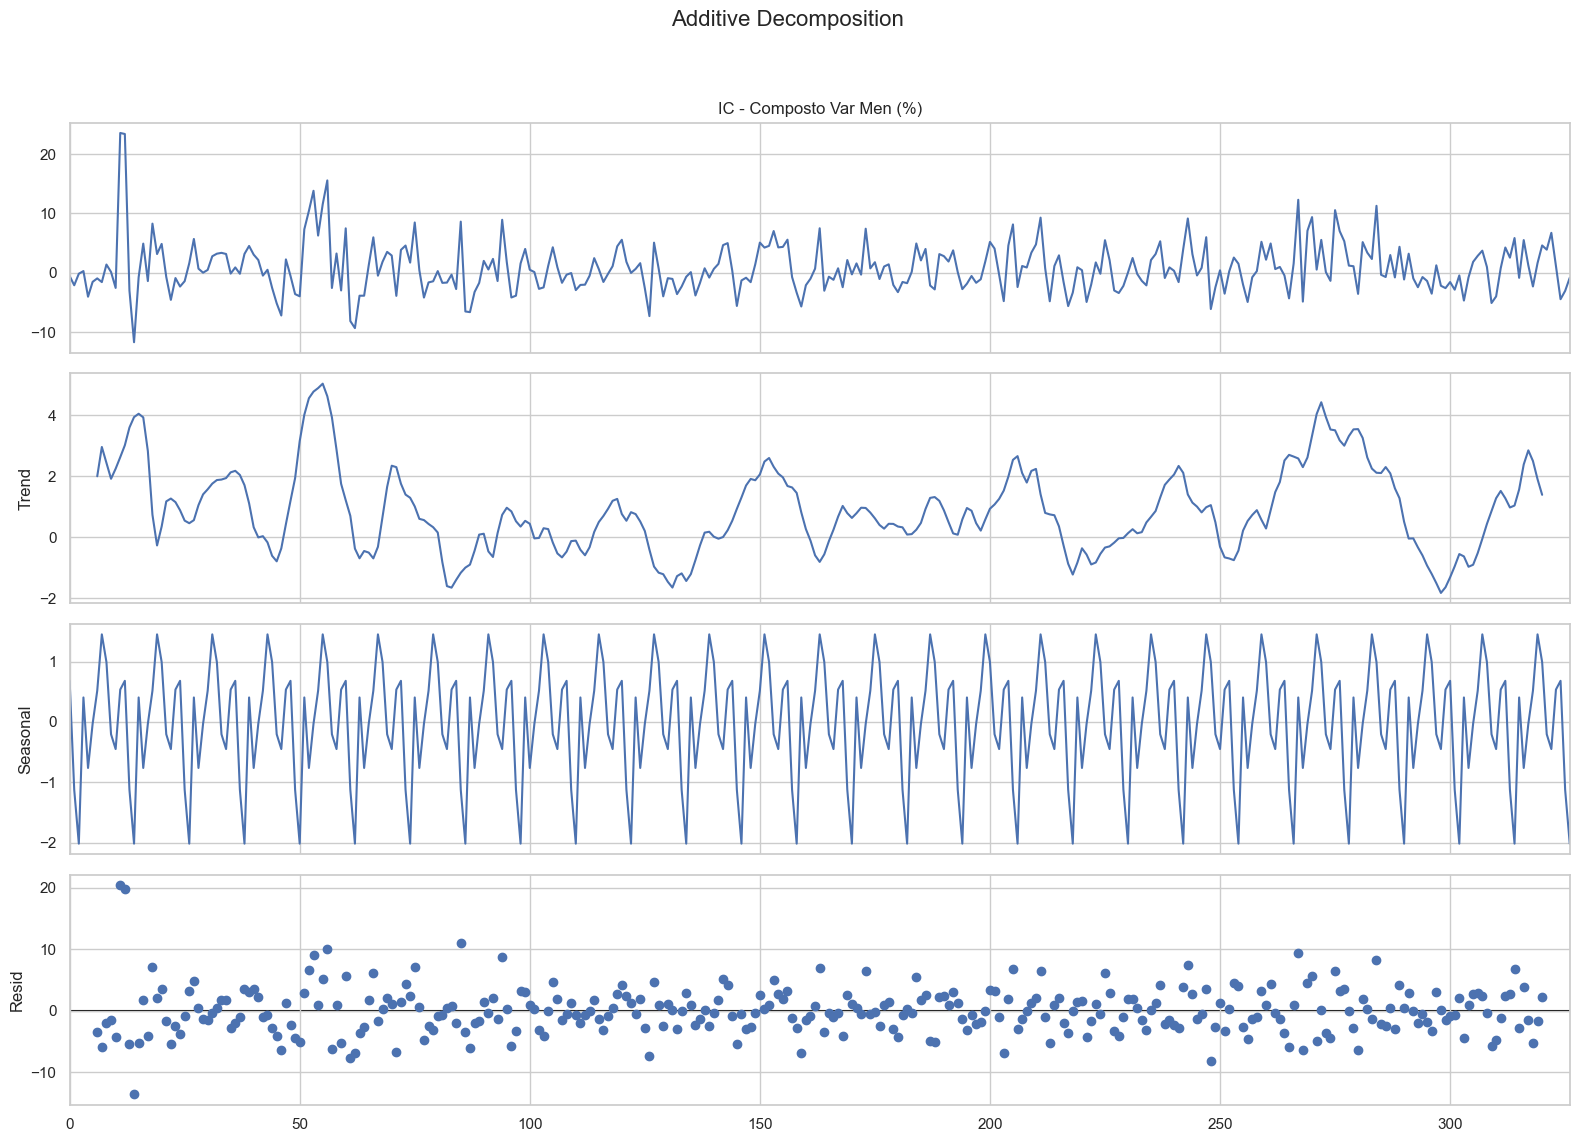

In [52]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

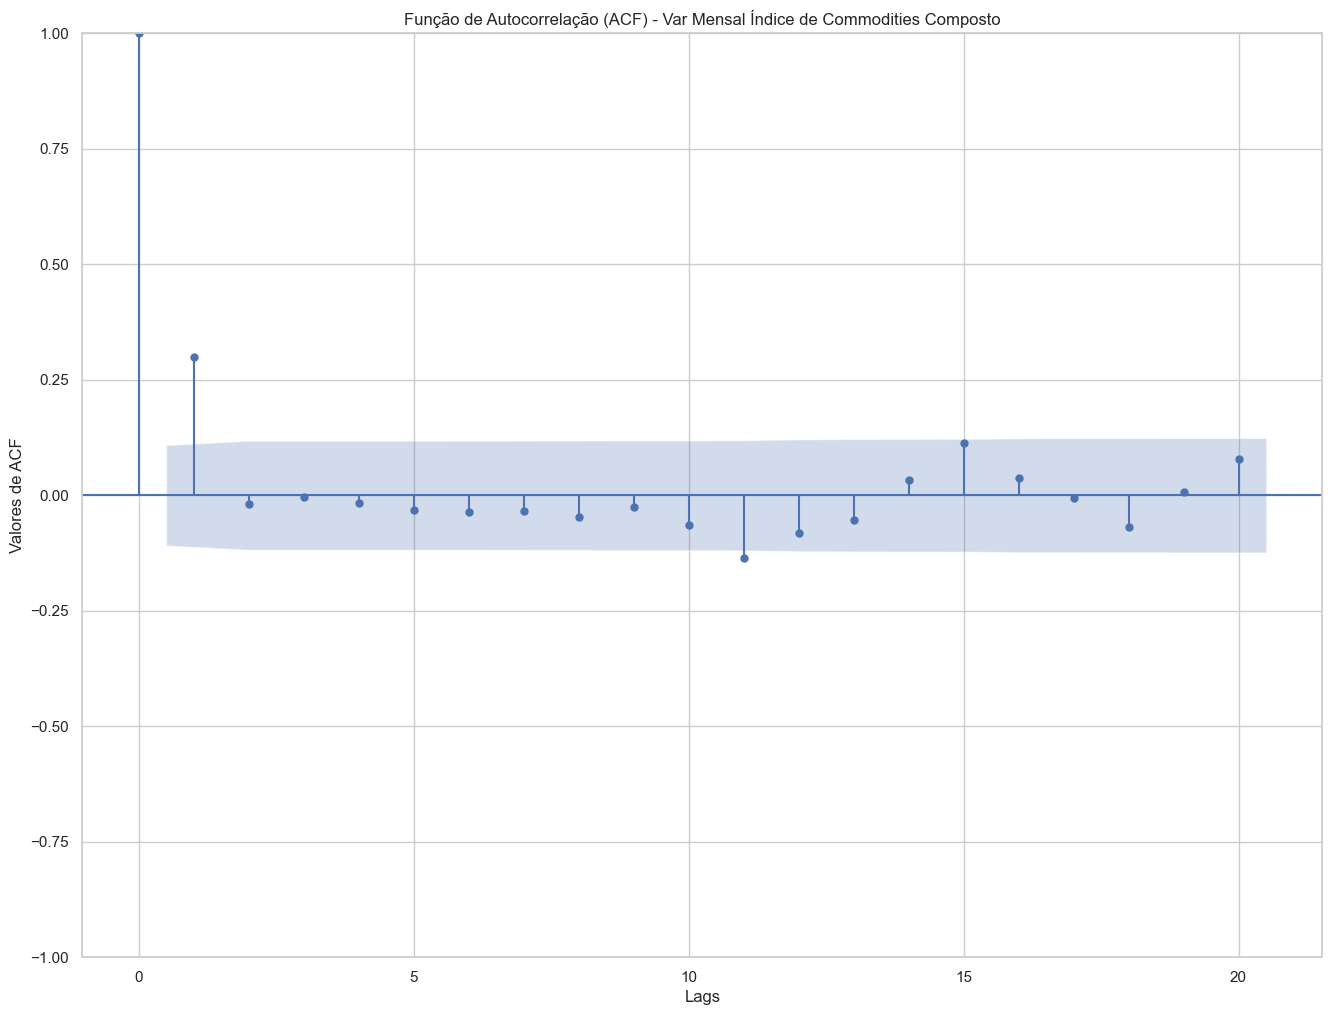

In [53]:
#Gráfico de ACF

plot_acf(df_ic["IC - Composto Var Men (%)"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal Índice de Commodities Composto")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

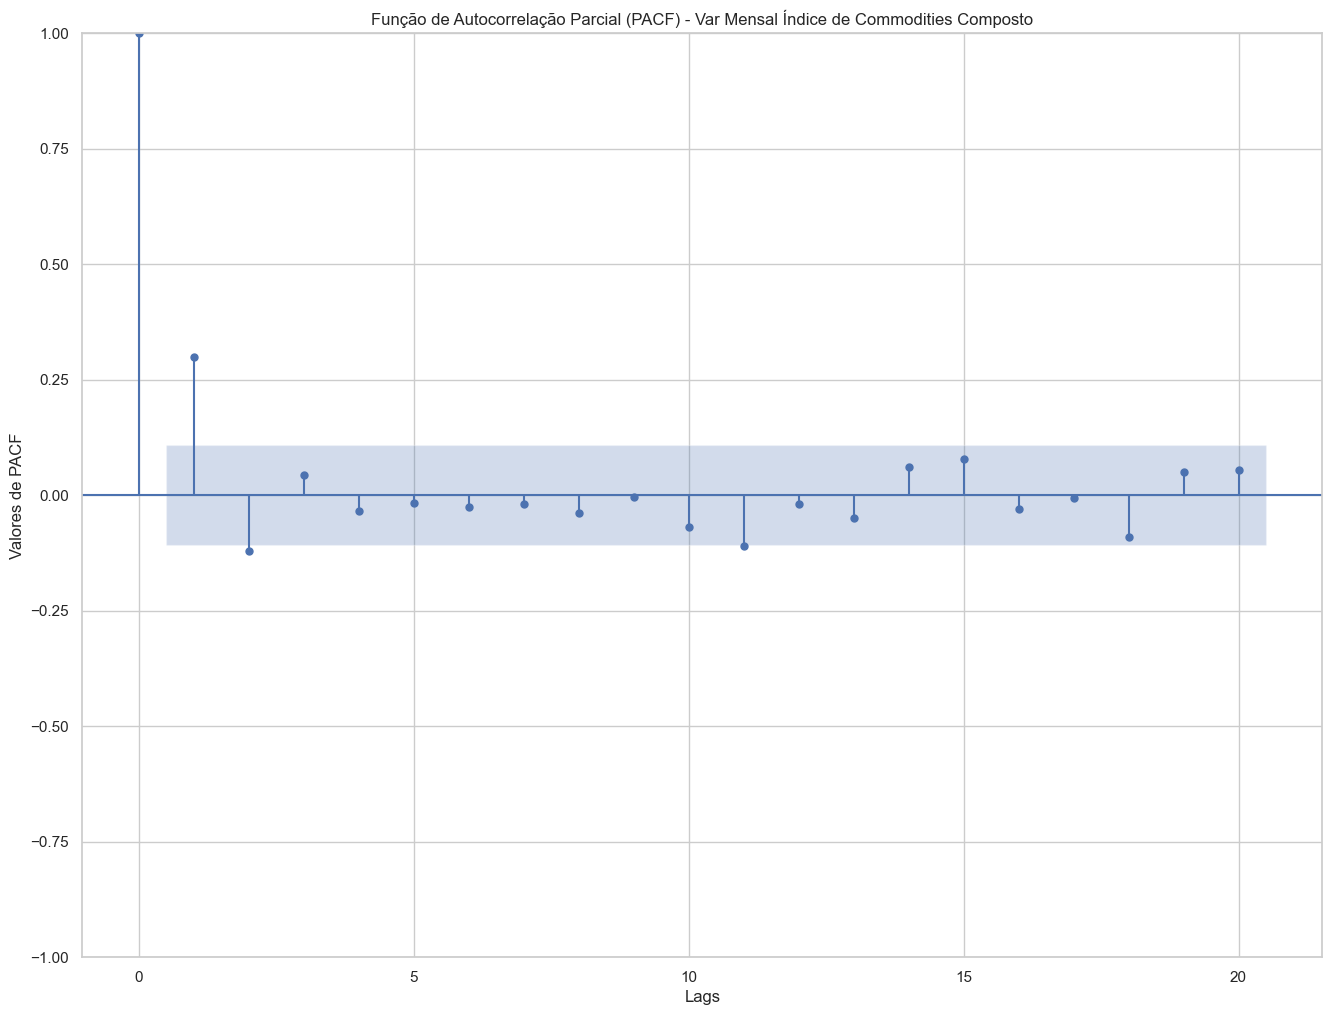

In [54]:
#Gráfico de PACF

plot_pacf(df_ic["IC - Composto Var Men (%)"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal Índice de Commodities Composto")
plt.xlabel("Lags")
plt.ylabel("Valores de PACF")
plt.show()

## Criação de dados em formato csv

In [55]:
df_ic.to_csv("base_dados_ic.csv", index=False)